# Linear Regressions and Logistic Regressions

> A Summary of lecture "Linear Regressions & Logistic Regressions in Python", via datacamp

- toc: true 
- badges: true
- comments: true

For now, limited to 1 explanatory (independent) variable to explain the response (numeric or categorical/logical)

Which one is the response variable?
Regression lets you predict the values of a response variable from known values of explanatory variables. Which variable you use as the response variable depends on the question you are trying to answer, but in many datasets there will be an obvious choice for variables that would be interesting to predict. Over the next few exercises, you'll explore a Taiwan real estate dataset with four variables.

Variable	Meaning
dist_to_mrt_station_m	Distance to nearest MRT metro station, in meters.
n_convenience	No. of convenience stores in walking distance.
house_age_years	The age of the house, in years, in three groups.
price_twd_msq	House price per unit area, in New Taiwan dollars per meter squared.
Print taiwan_real_estate in the console to view the dataset, and decide which variable would make a good response variable.

### Visualizing two numeric variables
Before you can run any statistical models, it's usually a good idea to visualize your dataset. Here, you'll look at the relationship between house price per area and the number of nearby convenience stores using the Taiwan real estate dataset.

One challenge in this dataset is that the number of convenience stores contains integer data, causing points to overlap. To solve this, you will make the points transparent.

taiwan_real_estate is available as a pandas DataFrame.

- Processing data

In [293]:
import pandas as pd
import sys, os
import seaborn as sns
from matplotlib import rcParams

sns.set(rc = {'figure.figsize':(11.7,7.27)})
rcParams['figure.figsize'] = 11.7,7.27
sns.set_style("dark")

path = 'C:/Users/T0230575/source/repos/DataCamp__/Python/_data'
os.chdir(path)
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
print(taiwan_real_estate.head())

   dist_to_mrt_m  n_convenience house_age_years  price_twd_msq
0       84.87882             10        30 to 45      11.467474
1      306.59470              9        15 to 30      12.768533
2      561.98450              5         0 to 15      14.311649
3      561.98450              5         0 to 15      16.580938
4      390.56840              5         0 to 15      13.040847


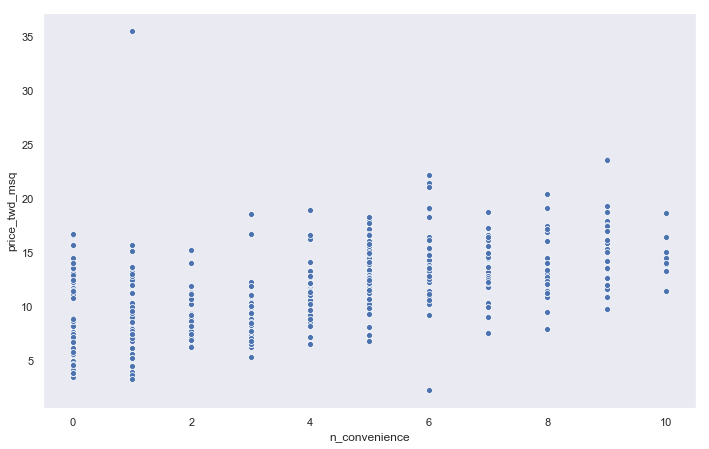

In [294]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

# Plot it
plt.show()

### Visualizing two numeric variables
Before you can run any statistical models, it's usually a good idea to visualize your dataset. Here, you'll look at the relationship between house price per area and the number of nearby convenience stores using the Taiwan real estate dataset.

One challenge in this dataset is that the number of convenience stores contains integer data, causing points to overlap. To solve this, you will make the points transparent.

taiwan_real_estate is available as a pandas DataFrame.

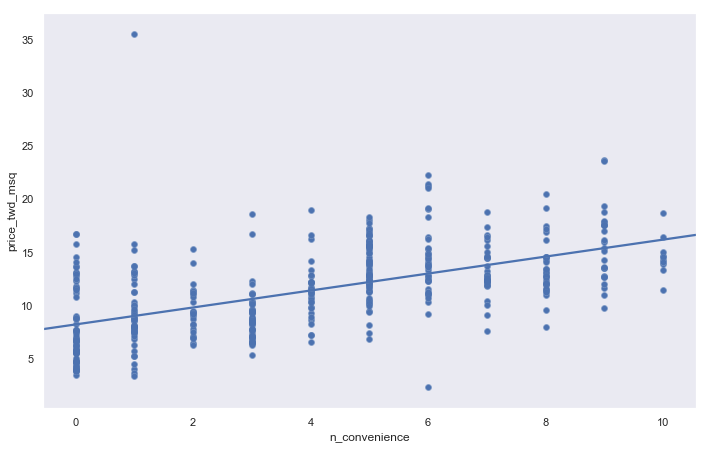

In [295]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate)

# Draw a trend line on the scatter plot of n_convenience vs. price_twd_msq
sns.regplot(x="n_convenience", 
y="price_twd_msq",
         data=taiwan_real_estate,
         ci=False,
         scatter_kws={'alpha': 0.5})

# Show the plot
plt.show()

Scatter plots are the standard way to visualize the relationship between two numeric variables, and seaborn makes adding linear trend lines easy.

### Linear regression with ols()

While sns.regplot() can display a linear regression trend line, it doesn't give you access to the intercept and slope as variables, or allow you to work with the model results as variables. That means that sometimes you'll need to run a linear regression yourself.

Time to run your first model!

taiwan_real_estate is available. TWD is an abbreviation for Taiwan dollars.

In addition, for this exercise and the remainder of the course, the following packages will be imported and aliased if necessary: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

In [296]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


#### Question
The model had an Intercept coefficient of 8.2242. What does this mean?
On average, a house with zero convenience stores nearby had a price of 8.2242 TWD per square meter.

The model had an n_convenience coefficient of 0.7981. What does this mean?
If you increase the number of nearby convenience stores by one, then the expected increase in house price is 0.7981 TWD per square meter.

The intercept is positive, so a house with no convenience stores nearby still has a positive price. The coefficient for convenience stores is also positive, so as the number of nearby convenience stores increases, so does the price of the house.

### Visualizing numeric vs. categorical

If the explanatory variable is categorical, the scatter plot that you used before to visualize the data doesn't make sense. Instead, a good option is to draw a histogram for each category.

The Taiwan real estate dataset has a categorical variable in the form of the age of each house. The ages have been split into 3 groups: 0 to 15 years, 15 to 30 years, and 30 to 45 years.

taiwan_real_estate is available.

   dist_to_mrt_m  n_convenience house_age_years  price_twd_msq
0       84.87882             10        30 to 45      11.467474
1      306.59470              9        15 to 30      12.768533
2      561.98450              5         0 to 15      14.311649
3      561.98450              5         0 to 15      16.580938
4      390.56840              5         0 to 15      13.040847


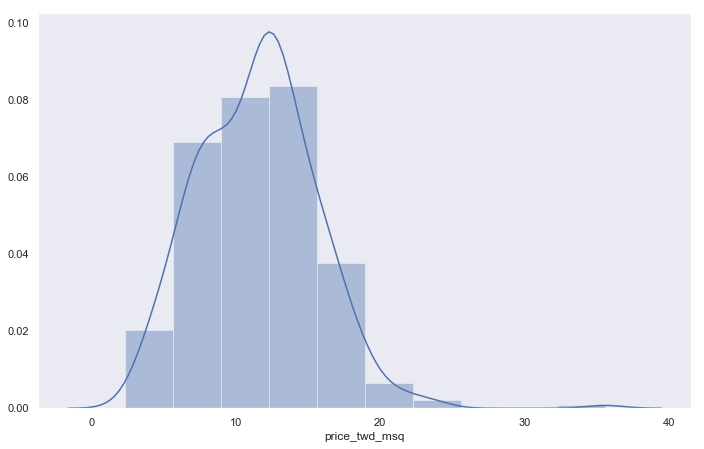

In [297]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
print(taiwan_real_estate.head())

sns.distplot(taiwan_real_estate['price_twd_msq'],
             color = None, #can insert here any categorical to facet~
             bins = 10)

# Show the plot
plt.show()

 It appears that new houses are the most expensive on average, and the medium aged ones (15 to 30 years) are the cheapest.

### Calculating means by category

A good way to explore categorical variables further is to calculate summary statistics for each category. For example, you can calculate the mean and median of your response variable, grouped by a categorical variable. As such, you can compare each category in more detail.

Here, you'll look at grouped means for the house prices in the Taiwan real estate dataset. This will help you understand the output of a linear regression with a categorical variable.

taiwan_real_estate is available as a pandas DataFrame.

In [298]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


### Linear regression with a categorical explanatory variable

Great job calculating those grouped means! As mentioned in the last video, the means of each category will also be the coefficients of a linear regression model with one categorical variable. You'll prove that in this exercise.

To run a linear regression model with categorical explanatory variables, you can just use the same code as with numeric explanatory variables. The coefficients returned by the model are different however. Here you'll run a linear regression on the Taiwan real estate dataset.

taiwan_real_estate is available and the ols() function is also loaded.

In [299]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq~house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [300]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years +0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


The coefficients of the model are just the means of each category you calculated previously. Fantastic job!

### Predicting house prices

Perhaps the most useful feature of statistical models like linear regression is that you can make predictions. That is, you specify values for each of the explanatory variables, feed them to the model, and you get a prediction for the corresponding response variable. The code flow is as follows.

``
explanatory_data = pd.DataFrame({"explanatory_var": list_of_values})
predictions = model.predict(explanatory_data)
prediction_data = explanatory_data.assign(response_var=predictions)
``

Here, you'll make predictions for the house prices in the Taiwan real estate dataset.

taiwan_real_estate is available. The fitted linear regression model of house price versus number of convenience stores is available as mdl_price_vs_conv. For future exercises, when a model is available, it will also be fitted.

In [301]:
# Import numpy with alias np
import numpy as np

# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


### Visualizing predictions

The prediction DataFrame you created contains a column of explanatory variable values and a column of response variable values. That means you can plot it on the same scatter plot of response versus explanatory data values.

prediction_data is available. The code for the plot you created using sns.regplot() in Chapter 1 is shown.

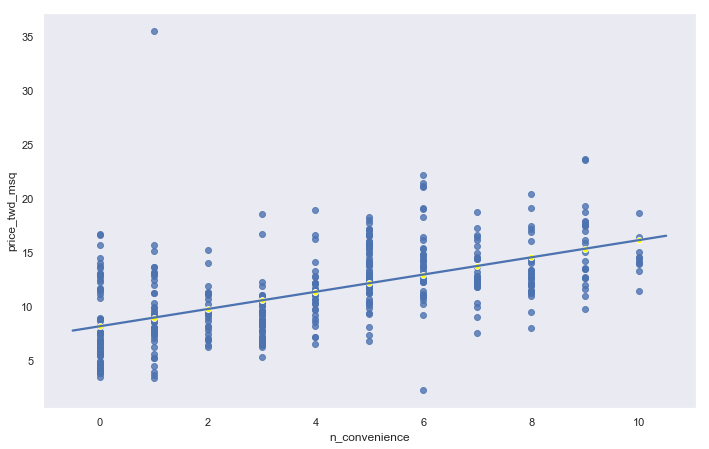

In [302]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience", y="price_twd_msq",data=prediction_data, color="yellow", alpha=1)

# Show the layered plot
plt.show()

### The limits of prediction

In the last exercise, you made predictions on some sensible, could-happen-in-real-life, situations. That is, the cases when the number of nearby convenience stores were between zero and ten. To test the limits of the model's ability to predict, try some impossible situations.

Use the console to try predicting house prices from mdl_price_vs_conv when there are -1 convenience stores. Do the same for 2.5 convenience stores. What happens in each case?

mdl_price_vs_conv is available.

- Processing data

In [303]:
# Define a DataFrame impossible
impossible = pd.DataFrame({"n_convenience": [-1, 2.5]})

#### Question
Try making predictions on your two impossible cases. What happens?
The model successfully gives a prediction about cases that are impossible in real life.
Linear models don't know what is possible or not in real life. That means that they can give you predictions that don't make any sense when applied to your data. You need to understand what your data means in order to determine whether a prediction is nonsense or not.

### Extracting model elements

The model object created by ols() contains many elements. In order to perform further analysis on the model results, you need to extract its useful bits. The model coefficients, the fitted values, and the residuals are perhaps the most important pieces of the linear model object.

mdl_price_vs_conv is available.

In [304]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv)
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [305]:
# Print the fitted values of mdl_price_vs_conv
# head(n=10)

print(mdl_price_vs_conv.fittedvalues.head(n=10))

0    16.205035
1    15.406955
2    12.214636
3    12.214636
4    12.214636
5    10.618477
6    13.810795
7    13.012716
8     9.022317
9    10.618477
dtype: float64


In [306]:
# Print the residuals of mdl_price_vs_conv
# head(n=10)

print(mdl_price_vs_conv.resid.head(n=10))

0   -4.737561
1   -2.638422
2    2.097013
3    4.366302
4    0.826211
5   -0.905920
6   -1.617149
7    1.117390
8   -3.333966
9   -3.931638
dtype: float64


In [307]:
# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Thu, 15 Apr 2021   Prob (F-statistic):           3.41e-37
Time:                        17:22:19   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

Working with individual pieces of the model is often more useful than working with the whole model object at once.

### Manually predicting house prices

You can manually calculate the predictions from the model coefficients. When making predictions in real life, it is better to use .predict(), but doing this manually is helpful to reassure yourself that predictions aren't magic - they are simply arithmetic.

In fact, for a simple linear regression, the predicted value is just the intercept plus the slope times the explanatory variable.

```
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>response</mtext>
  <mo>=</mo>
  <mtext>intercept</mtext>
  <mo>+</mo>
  <mtext>slope</mtext>
  <mo>&#x2217;</mo>
  <mtext>explanatory</mtext>
</math>
```

mdl_price_vs_conv and explanatory_data are available.

In [308]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


Note that a response value is always a fitted value + a residual (stuff explained + stuff that we couldn't explain).
Residuals exist because model is not perfect and there is randomness in data. Extreme responses are often due to luck, luck can run out, and extreme cases will look more like mean cases.

### Regression to the mean (for extreme values)
### Home run!

Regression to the mean is an important concept in many areas, including sports.

Here you can see a dataset of baseball batting data in 2017 and 2018. Each point represents a player, and more home runs are better. A naive prediction might be that the performance in 2018 would be that it is the same as the performance in 2017. That is, a linear regression would lie on the "y equals x" line.

Explore the plot and make predictions. What does regression to the mean say about the number of home runs in 2018 for a player who was very successful in 2017?

Due to regression to the mean, it's common that one player or team that does really well one year, doesn't do as well the next. Likewise players or teams that perform very badly one year do better the next year.

### Plotting consecutive portfolio returns

Regression to the mean is also an important concept in investing. Here you'll look at the annual returns from investing in companies in the Standard and Poor 500 index (S&P 500), in 2018 and 2019.

The sp500_yearly_returns dataset contains three columns:
A positive number for the return means the investment increased in value; negative means it lost value.

Just as with baseball home runs, a naive prediction might be that the investment performance stays the same from year to year, lying on the y equals x line.

sp500_yearly_returns is available as a pandas DataFrame.

- Pre-processing

In [309]:
sp500_yearly_returns = pd.read_csv('sp500_yearly_returns.csv')

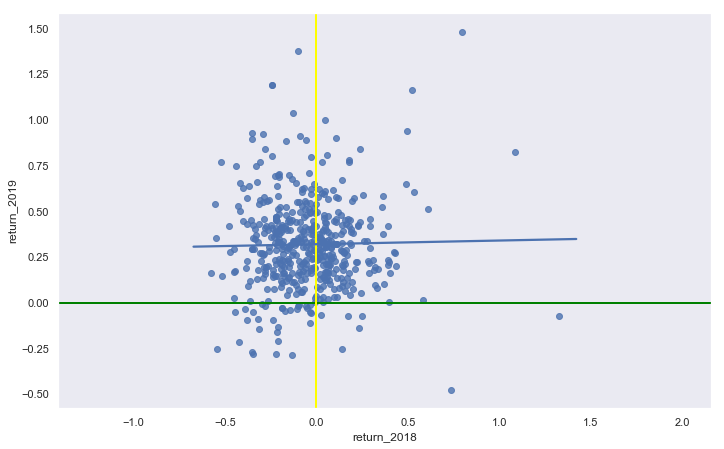

In [310]:
# Create a new figure, fig
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

fig = plt.figure()
# Plot the first layer: y = x
plt.axhline(y=0, linewidth=2, color="green")
plt.axvline(x=0, linewidth=2, color="yellow")

# Add scatter plot with linear regression trend line
sns.regplot(x="return_2018", y="return_2019", data=sp500_yearly_returns, ci=None)

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()

The regression trend line looks very different to the y equals x line. As the financial advisors say, "Past performance is no guarantee of future results."

In [311]:
# Run a linear regression on return_2019 vs. return_2018
# using sp500_yearly_returns
mdl_returns = ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

# Print the parameters
print(mdl_returns.params)

Intercept      0.321321
return_2018    0.020069
dtype: float64


### Modeling consecutive returns

Let's quantify the relationship between returns in 2019 and 2018 by running a linear regression and making predictions. By looking at companies with extremely high or extremely low returns in 2018, we can see if their performance was similar in 2019.

sp500_yearly_returns is available and ols() is loaded.

In [312]:
# From previous step
mdl_returns = ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({"return_2018": [-1, 0, 1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

0    0.301251
1    0.321321
2    0.341390
dtype: float64


Investments that gained a lot in value in 2018 on average gained only a small amount in 2019. Similarly, investments that lost a lot of value in 2018 on average also gained a small amount in 2019.

### Transforming variables before modeling

A solution to model data better, before adapting the model, is often to better understand and transform the data first if necessary (cube, square, log, exp, etc).

### Transforming the explanatory variable

If there is no straight line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. Here, you'll look at transforming the explanatory variable.

You'll take another look at the Taiwan real estate dataset, this time using the distance to the nearest MRT (metro) station as the explanatory variable. You'll use code to make every commuter's dream come true: shortening the distance to the metro station by taking the square root. Take that, geography!

taiwan_real_estate is available.

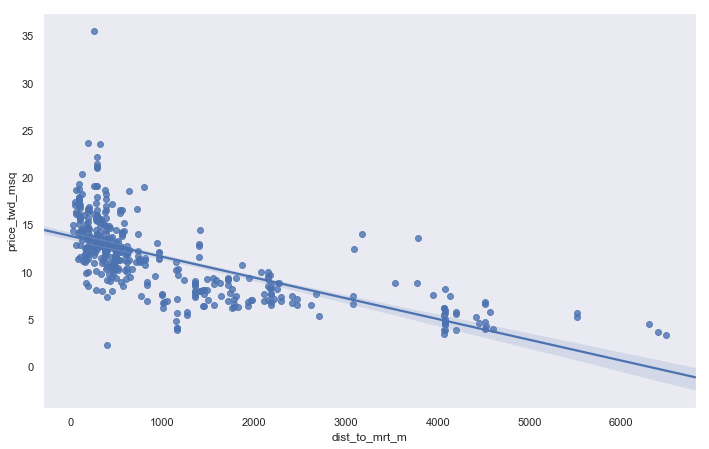

In [313]:
# Clear the plot
plt.figure()


# Plot using the transformed variable
sns.regplot(x='dist_to_mrt_m', y = 'price_twd_msq', data=taiwan_real_estate)
plt.show()

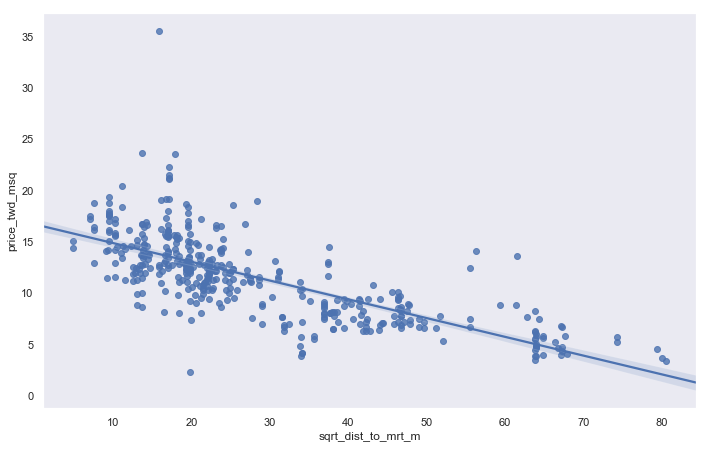

In [314]:
# Now we sqrt() the explanatory variable

# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Clear the plot
plt.figure()

# Plot using the transformed variable
sns.regplot(x='sqrt_dist_to_mrt_m', y = 'price_twd_msq', data=taiwan_real_estate)
plt.show()

In [315]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. 
# square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols('price_twd_msq ~ sqrt_dist_to_mrt_m', data=taiwan_real_estate).fit()

# Print the parameters
print(mdl_price_vs_dist.params)

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [316]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use this explanatory data
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Use mdl_price_vs_dist to predict explanatory_data
price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)
# See the result
print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


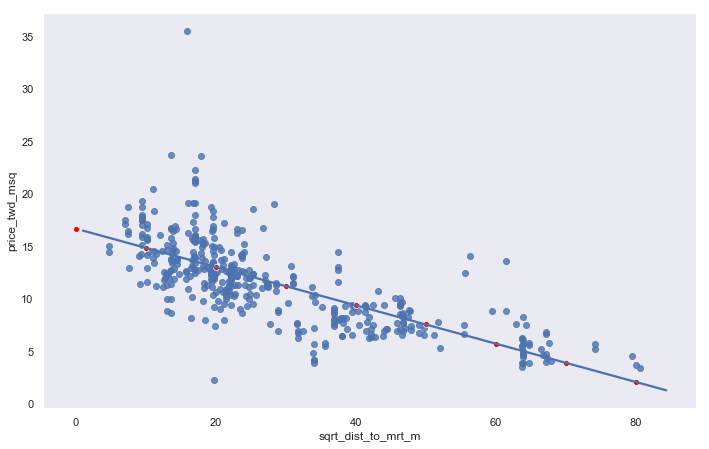

In [317]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use this explanatory data
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Use mdl_price_vs_dist to predict explanatory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x='sqrt_dist_to_mrt_m', y='price_twd_msq', data=prediction_data, color="red")
plt.show()

By transforming the explanatory variable, the relationship with the response variable became linear, and so a linear regression became an appropriate model.

### Transforming the response variable too

The response variable can be transformed too, but this means you need an extra step at the end to undo that transformation. That is, you "back transform" the predictions.

In the video, you saw the first step of the digital advertising workflow: spending money to buy ads, and counting how many people see them (the "impressions"). The next step is determining how many people click on the advert after seeing it.

ad_conversion is available as a pandas DataFrame.

- Pre-processing 

In [318]:
ad_conversion = pd.read_csv('ad_conversion.csv')

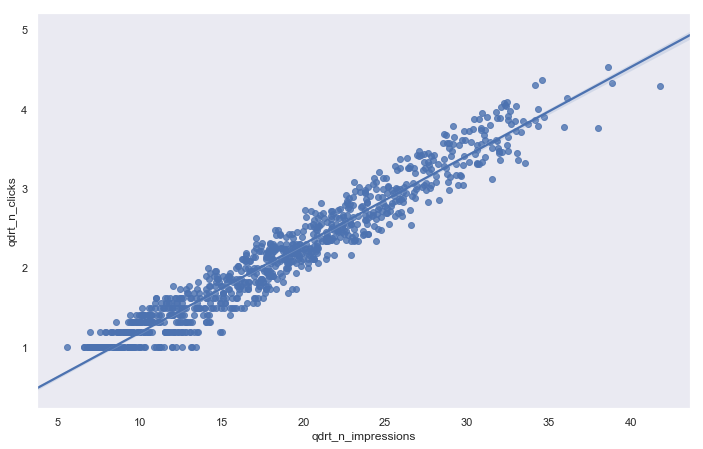

In [319]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion['n_impressions'] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion['n_clicks'] ** 0.25

# Clear the previous plot
plt.figure()

# Plot using the transformed variables
sns.regplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data=ad_conversion)
plt.show()

In [320]:
# From previous step
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols('qdrt_n_clicks ~ qdrt_n_impressions', data=ad_conversion).fit()
print(mdl_click_vs_impression.summary())

                            OLS Regression Results                            
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:22:22   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0

In [321]:
# From previous steps
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

# Use this explanatory data
explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


Since the response variable has been transformed, you'll now need to back-transform the predictions to correctly interpret your results.

### Back transformation

In the previous exercise, you transformed the response variable, ran a regression, and made predictions. But you're not done yet! In order to correctly interpret and visualize your predictions, you'll need to do a back-transformation.

prediction_data, which you created in the previous exercise, is available.

In [322]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000            0.0       0.071748    0.000026
1           26.591479       500000.0       3.037576   85.135121
2           31.622777      1000000.0       3.598732  167.725102
3           34.996355      1500000.0       3.974998  249.659131
4           37.606031      2000000.0       4.266063  331.214159
5           39.763536      2500000.0       4.506696  412.508546
6           41.617915      3000000.0       4.713520  493.607180


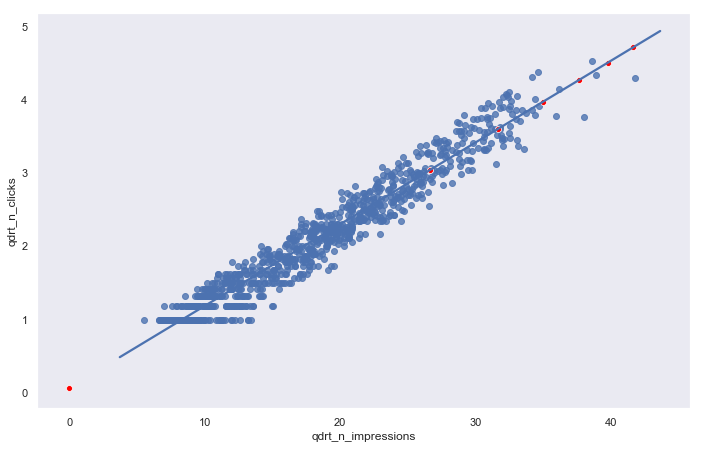

In [323]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=prediction_data, color="red")
plt.show()

Notice that your back-transformed predictions nicely follow the trend line and allow you to make more accurate predictions.

### Quantifying model fit

Understand & assess if model predictions are non-sense (how inaccurate it is).

1. Coefficient of determination : R-squared (1 is best, 0 is as good as randomness).

It can be defined as the proportion of variance in the response variable that is predictable (explainable) by the explanatory variable. It tells of the models at hand does a good or a poor job resuming our data.
Recall that the interpretation of r-squared is heavily dependent of the data we model, the context, the way we transform our variables etc.

Accessible inside .summary() or .rsquared

2. Residual standard error (RSE)

Residuals are the difference between a response predicted value VS an observed response value (the distance, or much the prediction is wrong).
It has the same unit as the response.

```
MSE = RSE**2
RSE = np.sqrt(MSE)
```

Accessible with .mse_resid()

To calculate RSE manually, we take the square of each residual, then we sum them up. We then calculate the degrees of freedom (# of observations minus the # of model coefficients). Finally,
we do the square root of the sum of square divided by the deg_freedom.

3. Root mean square error

The same as MSE except we do not remove the degrees of freedom (we divide only by the number of obs.)

### Coefficient of determination

The coefficient of determination is a measure of how well the linear regression line fits the observed values. For simple linear regression, it is equal to the square of the correlation between the explanatory and response variables.

Here, you'll take another look at the second stage of the advertising pipeline: modeling the click response to impressions. Two models are available: mdl_click_vs_impression_orig models n_clicks versus n_impressions. mdl_click_vs_impression_trans is the transformed model you saw in Chapter 2. It models n_clicks to the power of 0.25 versus n_impressions to the power of 0.25.

In [324]:
print(ad_conversion.head())

mdl_click_vs_impression_orig = ols('n_clicks ~ n_impressions' , data = ad_conversion).fit()

# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())


mdl_click_vs_impression_trans = ols('qdrt_n_clicks ~ qdrt_n_impressions  ' , data = ad_conversion).fit()

# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())

   spent_usd  n_impressions  n_clicks  qdrt_n_impressions  qdrt_n_clicks
0       1.43           7350         1            9.259165       1.000000
1       1.82          17861         2           11.560495       1.189207
2       1.25           4259         1            8.078429       1.000000
3       1.29           4133         1            8.018006       1.000000
4       4.77          15615         3           11.178551       1.316074
                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:22:23   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residu

In [325]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


#### Question
mdl_click_vs_impression_orig has a coefficient of determination of 0.89. Which statement about the model is true?

The number of impressions explains 89% of the variability in the number of clicks.

### Residual standard error
Residual standard error (RSE) is a measure of the typical size of the residuals. Equivalently, it's a measure of how wrong you can expect predictions to be. Smaller numbers are better, with zero being a perfect fit to the data.

Again, you'll look at the models from the advertising pipeline, mdl_click_vs_impression_orig and mdl_click_vs_impression_trans.

In [326]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875727


#### Question
mdl_click_vs_impression_orig has an RSE of about 20. Which statement is true?

The typical difference between observed number of clicks and predicted number of clicks is 20.


#### Question
Which model does the RSE suggest gives more accurate predictions? mdl_click_vs_impression_orig has an RSE of about 20, mdl_click_vs_impression_trans has an RSE of about 0.2.

mdl_click_vs_impression_trans.
RSE is a measure of accuracy for regression models. It even works on other other statistical model types like regression trees, so you can compare accuracy across different classes of models.

### Visualizing model fit

If a model is a good fit, normally, the residuals should be normally distributed along the model line/curve, and their mean should be 0.
It also shows when the fitted residuals go positive or negative (above/below the straight line).

1. Residual VS fitted values chart

Useful for visualizing trends. A curve following the y=0 line is the best accuracy possible. If the curve goes all over the place = bad accuracy.

sns.residplot()

2. Q-Q Plot

If the points trek along the straight line, then they are normally distributed and validate the best conditions. If not, they aren't.

qqplot() (from statsmodels.api import qqplot)

3. Square root of Standardized Residuals VS fitted values, Scale-location plot

This shows the sizes of the residuals and whether they get smaller or bigger as the fitted values change. Again it has to be stable, if it bounces all over or is irregular, it means residuals tend to vary randomly or in an inconsistent way as fitted values change = poor fit.

Requires more pre-processing.
See exercise.

### Drawing diagnostic plots
It's time for you to draw these diagnostic plots yourself using the Taiwan real estate dataset and the model of house prices versus number of convenience stores.

taiwan_real_estate is available as a pandas DataFrame and mdl_price_vs_conv is available.

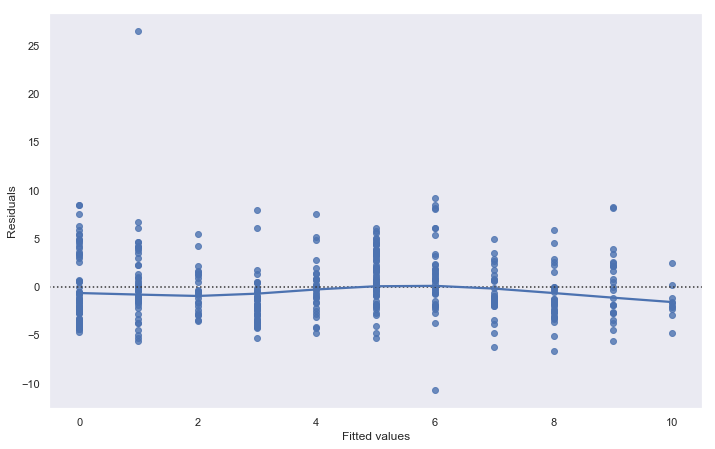

In [327]:
# Plot the residuals vs. fitted values
sns.residplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

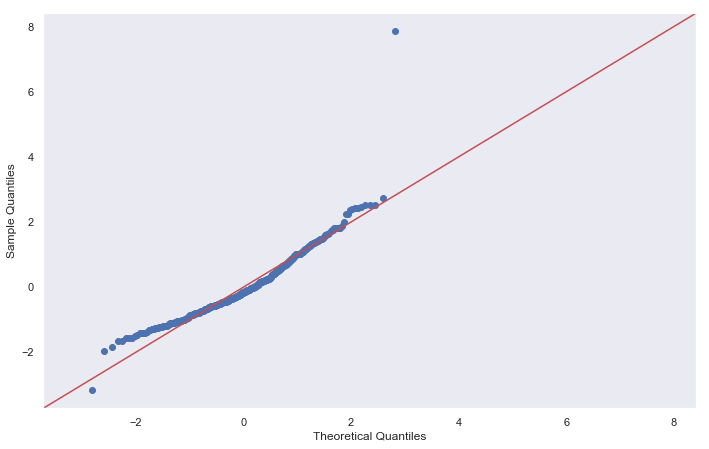

In [328]:
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

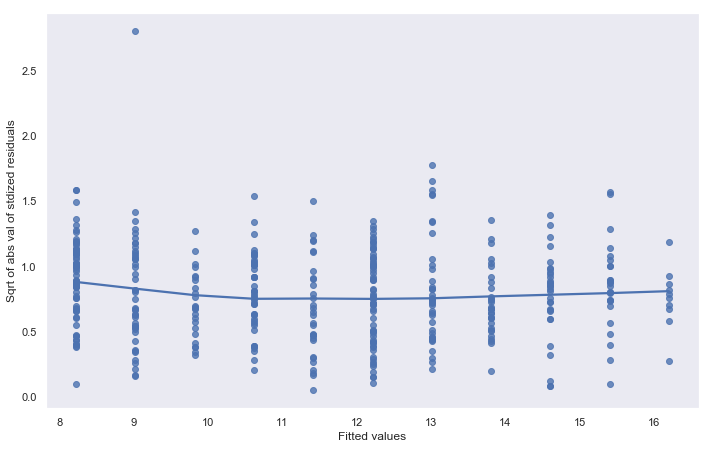

In [329]:
# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

### Outliers, leverage & influence

Some special values can have strong effects on our models.
Removing 1 or 2 extreme datapoints can completly change the slope of the fit.

1. Unusual datapoints, outliers, data is extreme

Easy to visualize them, it can either be far away from the model fit, or far away from the datapoint along the fit (horizontally / vertically).

2. Leverage & influence

Leverage and influence are important concepts for determining whether your model is overly affected by some unusual data points.

Leverage is a measure of how extreme the explanatory variables values are.
Observations with a large distance to the nearest MRT station have the highest leverage, because most of the observations have a short distance, so long distances are more extreme.
Highly leveraged points are the ones with explanatory variables that are furthest away from the others.

Influence measures how much the model would change if you left the observation out of the dataset when modeling.
Observations far away from the trend line have high influence, because they have large residuals and are far away from other observations.
The majority of the influential houses were those with prices that were much higher than the model predicted (and one with a price that was much lower).


.get_influence()
.summary_frame()

Influence is based on Cook's distance, accessible in summary().

In [330]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()
print(summary_info.head(n=10))

   dfb_Intercept  dfb_sqrt_dist_to_mrt_m       cooks_d  standard_resid  \
0      -0.094893                0.073542  4.648246e-03       -1.266363   
1      -0.013981                0.008690  1.216711e-04       -0.262996   
2       0.025510               -0.009963  6.231096e-04        0.688143   
3       0.055525               -0.021686  2.939394e-03        1.494602   
4      -0.000932                0.000518  6.055123e-07       -0.019716   
5      -0.012257                0.029560  7.976174e-04        0.544490   
6       0.000592               -0.000187  3.896928e-07        0.017531   
7       0.010115               -0.006428  6.232088e-05        0.185284   
8      -0.087118                0.126666  9.060428e-03        0.915959   
9       0.009041               -0.033610  1.378024e-03       -0.818660   

   hat_diag  dffits_internal  student_resid    dffits  
0  0.005764        -0.096418      -1.267294 -0.096489  
1  0.003506        -0.015599      -0.262699 -0.015582  
2  0.002625      

In [331]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info['hat_diag']

# Sort taiwan_real_estate by leverage in descending order and print the head
print(taiwan_real_estate.sort_values(by='leverage', ascending=False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
347       6488.021              1        15 to 30       3.388805   
116       6396.283              1        30 to 45       3.691377   
249       6306.153              1        15 to 30       4.538578   
255       5512.038              1        30 to 45       5.264750   
8         5512.038              1        30 to 45       5.688351   

     sqrt_dist_to_mrt_m  leverage  
347           80.548253  0.026665  
116           79.976765  0.026135  
249           79.411290  0.025617  
255           74.243101  0.021142  
8             74.243101  0.021142  


In [332]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan_real_estate.sort_values("cooks_dist", ascending=False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
270       252.5822              1         0 to 15      35.552194   
148      3780.5900              0        15 to 30      13.645991   
228      3171.3290              0         0 to 15      14.099849   
220       186.5101              9        30 to 45      23.691377   
113       393.2606              6         0 to 15       2.299546   

     sqrt_dist_to_mrt_m  leverage  cooks_dist  
270           15.892835  0.003849    0.115549  
148           61.486503  0.012147    0.052440  
228           56.314554  0.009332    0.035384  
220           13.656870  0.004401    0.025123  
113           19.830799  0.003095    0.022813  


### Logistic Regression

What if the response variable is binary/logical ?
-Yes/no, 1/0, Blue/Red, etc.

Logistic Regression is another type of generalized linear model for categorical responses.

The response follow a logistic S curve.
We can think about the fitted values between 0 & 1 as probabilities.

### Exploring the explanatory variables
When the response variable is logical, all the points lie on the y equals zero and y equals one lines, making it difficult to see what is happening. In the video, until you saw the trend line, it wasn't clear how the explanatory variable was distributed on each line. This can be solved with a histogram of the explanatory variable, grouped by the response.

You will use these histograms to get to know the financial services churn dataset seen in the video.

churn is available as a pandas DataFrame.

- Pre-processing

In [333]:
churn = pd.read_csv('churn.csv')
print(churn.head())

   has_churned  time_since_first_purchase  time_since_last_purchase
0            0                  -1.089221                 -0.721322
1            0                   1.182983                  3.634435
2            0                  -0.846156                 -0.427582
3            0                   0.086942                 -0.535672
4            0                  -1.166642                 -0.672640


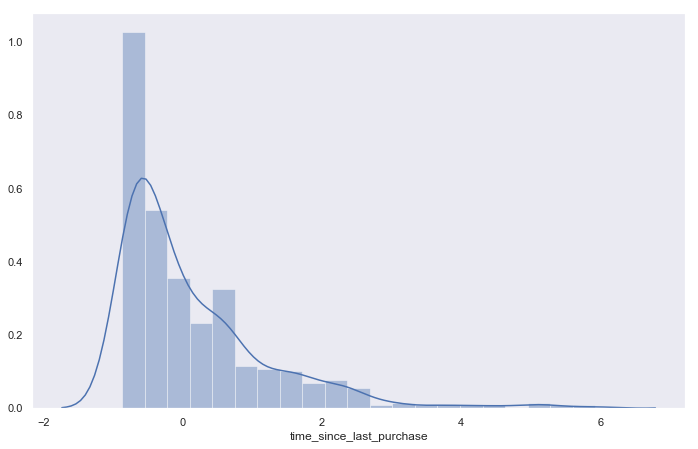

[0 1]


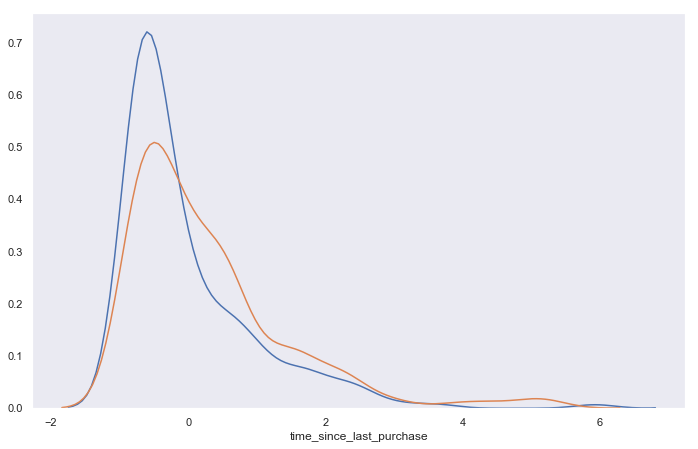

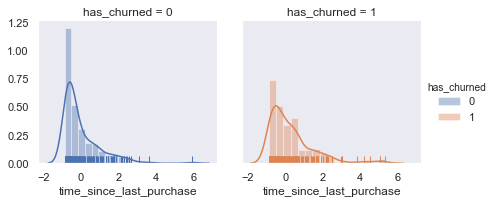

In [334]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.distplot(churn['time_since_last_purchase'])

# Show the plot
plt.show()

print(churn['has_churned'].unique())

for x in churn['has_churned'].unique():
    values = churn.time_since_last_purchase[churn['has_churned'] == x]
    sns.distplot(values, hist=False, rug=False)
    
g = sns.FacetGrid(churn, col='has_churned', hue='has_churned')
p1 = g.map(sns.distplot, 'time_since_last_purchase', hist=True, rug=True).add_legend()

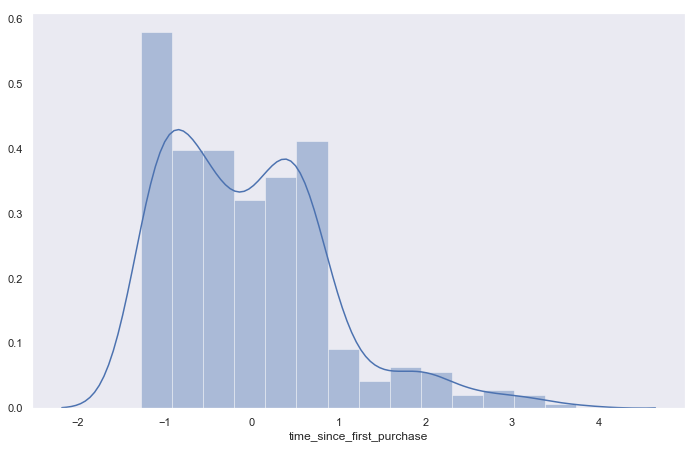

[0 1]


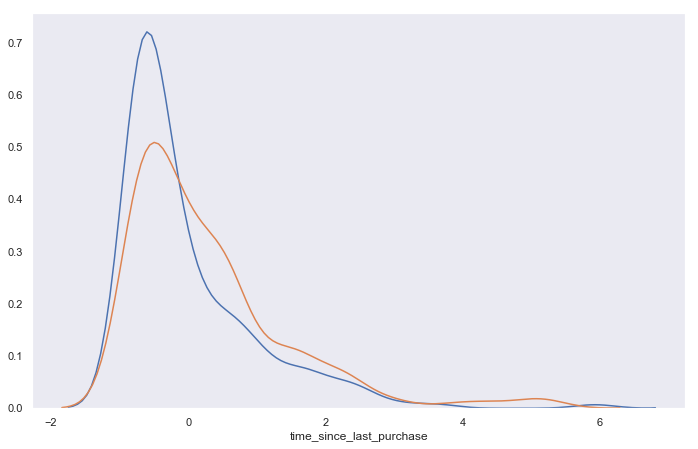

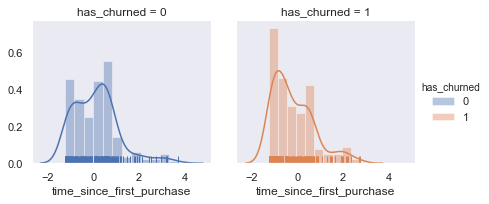

In [335]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.distplot(churn['time_since_first_purchase'])

# Show the plot
plt.show()

print(churn['has_churned'].unique())

for x in churn['has_churned'].unique():
    values = churn.time_since_last_purchase[churn['has_churned'] == x]
    sns.distplot(values, hist=False, rug=False)
    
g = sns.FacetGrid(churn, col='has_churned', hue='has_churned')
p1 = g.map(sns.distplot, 'time_since_first_purchase', hist=True, rug=True).add_legend()

In the time_since_last_purchase plot, the distribution of churned customers was further right than the distribution of non-churned customers (churners typically have longer times since their last purchase). For time_since_first_purchase the opposite is true: churners have a shorter length of relationship.

### Visualizing linear and logistic models
As with linear regressions, regplot() will draw model predictions for a logistic regression without you having to worry about the modeling code yourself. To see how the predictions differ for linear and logistic regressions, try drawing both trend lines side by side. Spoiler: you should see a linear (straight line) trend from the linear model, and a logistic (S-shaped) trend from the logistic model.

churn is available.

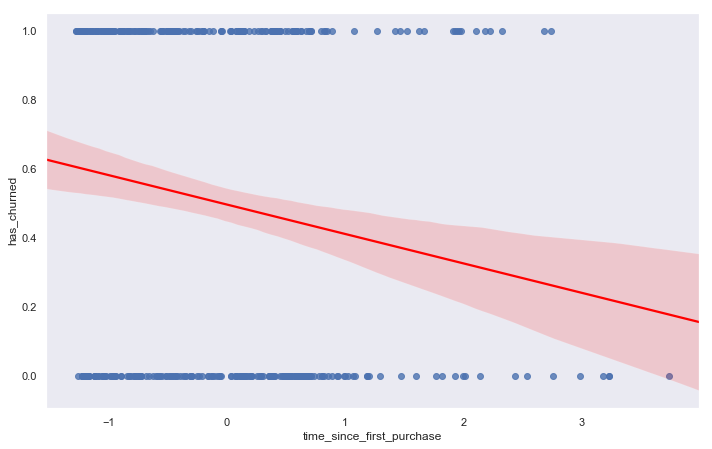

In [336]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(data = churn, x='time_since_first_purchase',y='has_churned',
            line_kws={"color": "red"})

# Show the plot
plt.show()

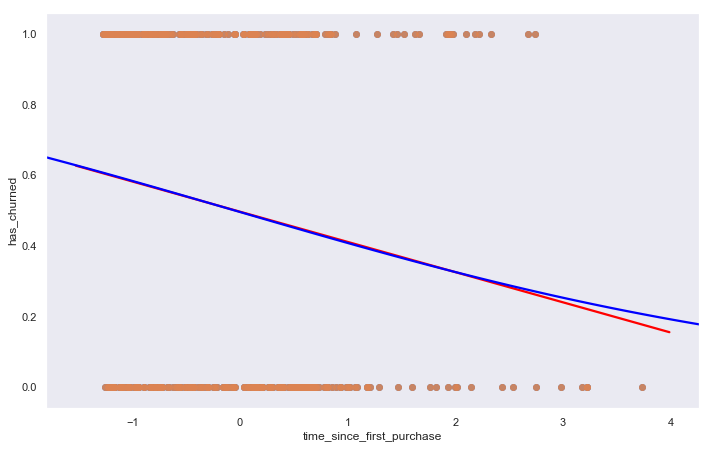

In [337]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True,
            line_kws={"color": "blue"})

# Show the plot
plt.show()

The two models give similar predictions in some places, but notice the slight curve in the logistic model trend.

### Logistic regression with logit()
Logistic regression requires another function from statsmodels.formula.api: logit(). It takes the same arguments as ols(): a formula and data argument. You then use .fit() to fit the model to the data.

Here, you'll model how the length of relationship with a customer affects churn.

churn is available.

In [338]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. 
# length of relationship using the churn dataset
mdl_churn_vs_relationship = logit('has_churned~time_since_first_purchase', data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


 The code to run a logistic regression is a simple change from the code to run a linear regression. Now we can make some predictions with the model.

### Prediction & Odds ratios

1. Odds ratios

The probability of something happening divided by the probability that it doesn't. (P / (1-P)). Prob For / Prob Against.
It cannot be compared to the original data but can be plotted with a special chart instead.
The units is the chance for ... happening (3 = 3 times the chance for...).
Easy to interpret, not easy to change data, precise.

2. Log odds ratio

A nice property of odds ratios, is passing them into a log() = linear regression. Changes in data easy to interpret, precise.

3. Most likely Outcome

In logistic regression, we speak about the rounded most likely outcome (response > 0.5 chance of churning, of ...) as response value can be interpreted a probabilities. Very easy to interpret, easy to change data, not precise (rounded).

4. Probability

The original data. easy to interpret, not easy to change data on-the-go, precise.

### Probabilities
There are four main ways of expressing the prediction from a logistic regression model – we'll look at each of them over the next four exercises. Firstly, since the response variable is either "yes" or "no", you can make a prediction of the probability of a "yes". Here, you'll calculate and visualize these probabilities.

Two variables are available:

mdl_churn_vs_relationship is the fitted logistic regression model of has_churned versus time_since_first_purchase.
explanatory_data is a DataFrame of explanatory values.

In [339]:
explanatory_data = pd.DataFrame({'time_since_first_purchase': np.arange(-1.5, 4, .35)})

# Create prediction_data
prediction_data = explanatory_data.assign(
  has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned
0                      -1.50     0.626448
1                      -1.15     0.596964
2                      -0.80     0.566762
3                      -0.45     0.536056
4                      -0.10     0.505074


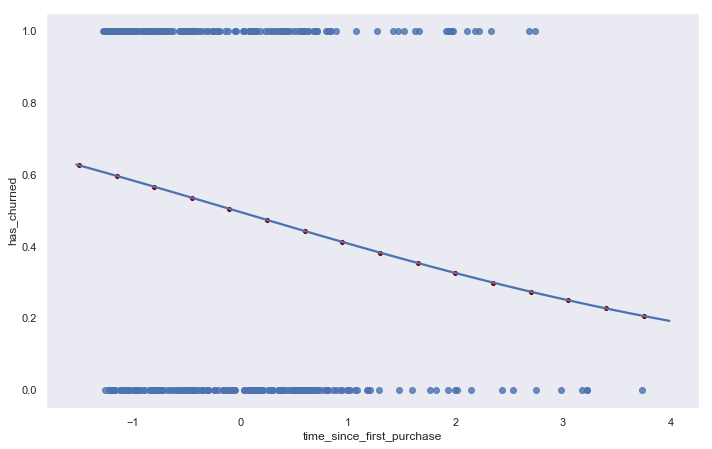

In [340]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

# Create a new figure
fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",
                y="has_churned",
                data=prediction_data,
                color="darkred")

# Show the plot
plt.show()

The probability of a positive response is a natural way of thinking about predictions.

### Most likely outcome
When explaining your results to a non-technical audience, you may wish to side-step talking about probabilities and simply explain the most likely outcome. That is, rather than saying there is a 60% chance of a customer churning, you say that the most likely outcome is that the customer will churn. The trade-off here is easier interpretation at the cost of nuance.

mdl_churn_vs_relationship, explanatory_data, and prediction_data are available from the previous exercise.

In [341]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome
0                      -1.50     0.626448                  1.0
1                      -1.15     0.596964                  1.0
2                      -0.80     0.566762                  1.0
3                      -0.45     0.536056                  1.0
4                      -0.10     0.505074                  1.0


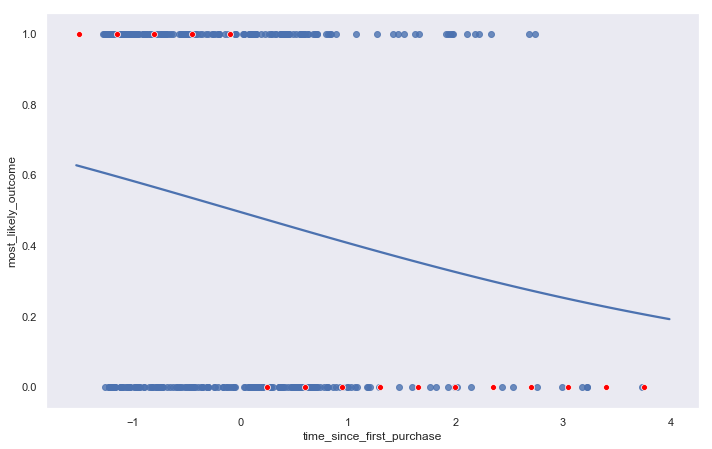

In [342]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# Create a new figure
fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",
                y="most_likely_outcome",
                data=prediction_data,
                color="red")

# Show the plot
plt.show()

The most likely outcome is that you will master logistic regression! Providing the most likely response is a great way to share the model results with a non-technical audience.

### Odds ratio
Odds ratios compare the probability of something happening with the probability of it not happening. This is sometimes easier to reason about than probabilities, particularly when you want to make decisions about choices. For example, if a customer has a 20% chance of churning, it may be more intuitive to say "the chance of them not churning is four times higher than the chance of them churning".

mdl_churn_vs_relationship, explanatory_data and prediction_data are available from the previous exercise.

In [343]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio
0                      -1.50     0.626448                  1.0    1.677003
1                      -1.15     0.596964                  1.0    1.481166
2                      -0.80     0.566762                  1.0    1.308199
3                      -0.45     0.536056                  1.0    1.155431
4                      -0.10     0.505074                  1.0    1.020502


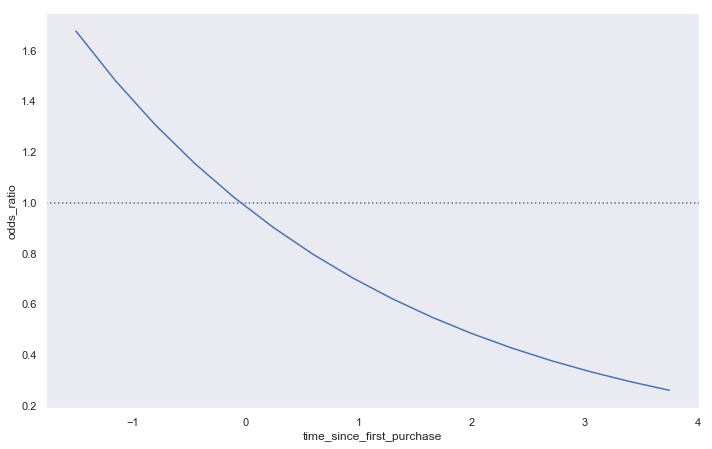

In [344]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

# Create a new figure
fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x='time_since_first_purchase', y='odds_ratio', data = prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

# Show the plot
plt.show()

Odds ratios provide an alternative to probabilities that make it easier to compare positive and negative responses.

### Log odds ratio
One downside to probabilities and odds ratios for logistic regression predictions is that the prediction lines for each are curved. This makes it harder to reason about what happens to the prediction when you make a change to the explanatory variable. The logarithm of the odds ratio (the "log odds ratio" or "logit") does have a linear relationship between predicted response and explanatory variable. That means that as the explanatory variable changes, you don't see dramatic changes in the response metric - only linear changes.

Since the actual values of log odds ratio are less intuitive than (linear) odds ratio, for visualization purposes it's usually better to plot the odds ratio and apply a log transformation to the y-axis scale.

mdl_churn_vs_relationship, explanatory_data and prediction_data are available from the previous exercise.

In [345]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data['odds_ratio'])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio  \
0                      -1.50     0.626448                  1.0    1.677003   
1                      -1.15     0.596964                  1.0    1.481166   
2                      -0.80     0.566762                  1.0    1.308199   
3                      -0.45     0.536056                  1.0    1.155431   
4                      -0.10     0.505074                  1.0    1.020502   

   log_odds_ratio  
0        0.517008  
1        0.392830  
2        0.268651  
3        0.144473  
4        0.020295  


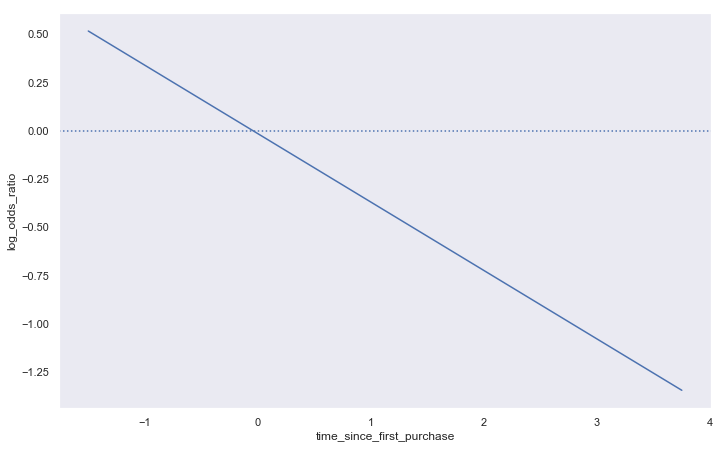

In [346]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

# Create a new figure
fig = plt.figure()

# Update the line plot: log_odds_ratio vs time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

# Show the plot
plt.show()

The linear relationship between predicted log odds ratio and the explanatory variable makes changes easier to reason about.

### Quantifying logistic regression fit

Resid plot, QQplot & Scale location plot are less useful in the case of logistic regression. Instead, we can use confusion matrices to analyze the fit performance. With True/False positive & negative outcomes.
We can also compute metrics based on various ratios.

1. Accuracy : proportion of correct predictions. Higher better.

TN+TP / (TN+FN+FP+TP)

2. Sensitivity : proportions of observations where the actual response was true and where the model also predicted it was true. Higher better.

TP / (FN + TP)

3. Specificity : proportions of observations where the actual was false and where the model also predicted it was false. Higher better.

TN / (TN + FP)

### Calculating the confusion matrix
A confusion matrix (occasionally called a confusion table) is the basis of all performance metrics for models with a categorical response (such as a logistic regression). It contains the counts of each actual response-predicted response pair. In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.

1. True positive: The customer churned and the model predicted they would.
2. False positive: The customer didn't churn, but the model predicted they would.
3. True negative: The customer didn't churn and the model predicted they wouldn't.
4. False negative: The customer churned, but the model predicted they wouldn't.

In [347]:
# Get the actual responses
actual_response = churn["has_churned"]

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response": actual_response,
                         "predicted_response": predicted_response})

print(type(outcomes))
print(outcomes.columns)
# Print the outcomes
# print(outcomes.value_counts(sort = False))
# print(pd.value_counts(outcomes.values.flatten()))
conf_matrix = pd.crosstab(outcomes['actual_response'], outcomes['predicted_response'], rownames=['Actual'], colnames=['Predicted'])
print(conf_matrix)

<class 'pandas.core.frame.DataFrame'>
Index(['actual_response', 'predicted_response'], dtype='object')
Predicted  0.0  1.0
Actual             
0          112   88
1           76  124


### Drawing a mosaic plot of the confusion matrix
While calculating the performance matrix might be fun, it would become tedious if you needed multiple confusion matrices of different models. Luckily, the .pred_table() method can calculate the confusion matrix for you.

Additionally, you can use the output from the .pred_table() method to visualize the confusion matrix, using the mosaic() function.

churn and mdl_churn_vs_relationship are available.

[[112.  88.]
 [ 76. 124.]]


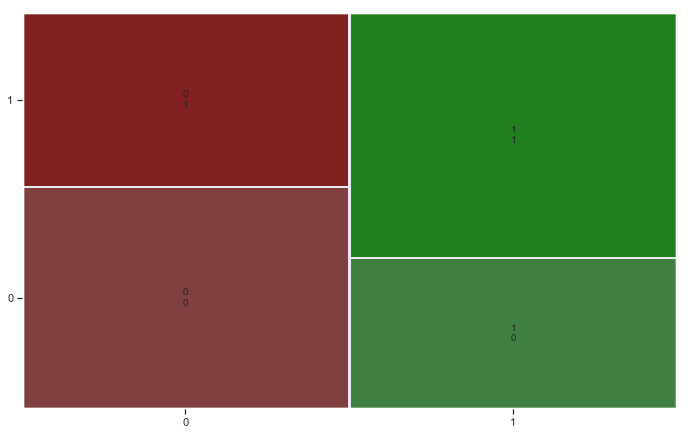

In [348]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

Accuracy, sensitivity, and specificity are the most important performance metrics for logistic regression models. In the last exercise, you'll learn how to calculate them.

In [349]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56


Using these metrics, it becomes much easier to interpret and compare logistic regression models.